___
#### Prog.  Read and convert RGB image to YUV image and vice versa
___

## Read image and covert into RBG

Text(0.5, 1.0, 'Dome image in RBG ')

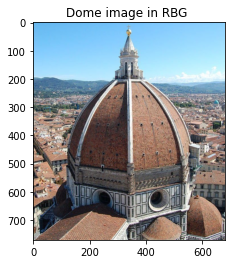

In [204]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
color_img = cv2.imread('work.jpg',1)                #read a color image in BGR
row,col,px = color_img.shape

img1=color_img.copy()                                #covert BGR into RBG
img1[:,:,0]=color_img[:,:,2]
img1[:,:,2]=color_img[:,:,0]

plt.imshow(img1)                                    #
plt.title('Dome image in RBG ')


##                     Convert RBG image to YUV

Text(0.5, 1.0, 'Dome Image in YUV')

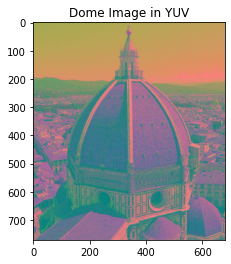

In [205]:
img_yuv = np.zeros(color_img.shape)
m = np.array([[ 0.29900, -0.16874,  0.50000],
                 [0.58700, -0.33126, -0.41869],
                 [ 0.11400, 0.50000, -0.08131]])
for i in range (row):
    for j in range (col):
        # print(color_img[i][j]) 
        B = color_img[i][j][0]
        G = color_img[i][j][1]
        R = color_img[i][j][2]
        # [b, g, r] to [y, u, v]
        Y = ((0.299   * R + 0.587   * G + 0.114 * B));
        U = ((- 0.168736 * R - 0.331264 * G + 0.5 * B)+128);
        V = ((0.5 * R - 0.418688 * G - 0.081312 * B)+128);
        img_yuv[i][j] = [Y, U, V]
          
        
yuv = img_yuv.astype(np.uint8)
plt.imshow(yuv)
plt.title('Dome Image in YUV')

##                     Convert YUV image to RBG

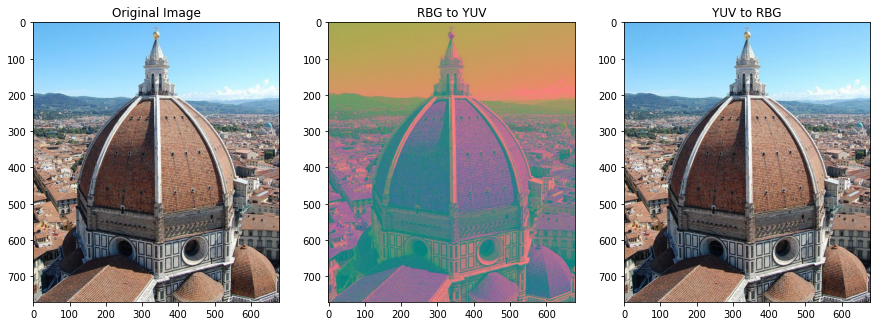

In [220]:
# Conversion matrix for YUV to RGB
n = np.array([[ 1.0, 1.0, 1.0],                 
                 [-0.000007154783816076815, -0.3441331386566162, 1.7720025777816772],
                 [ 1.4019975662231445, -0.7141380310058594 , 0.00001542569043522235] ])
    
rgb = np.dot(img_yuv,n)
rgb[:,:,0]-=179.45477266423404
rgb[:,:,1]+=135.45870971679688
rgb[:,:,2]-=226.8183044444304
rgb = rgb.clip(0,255)
r = rgb.astype(np.uint8)



f, axarr = plt.subplots(1,3, figsize=(15, 15))

axarr[0].imshow(img1)
axarr[1].imshow(yuv)
axarr[2].imshow(r)
axarr[0].title.set_text('Original Image')
axarr[1].title.set_text('RBG to YUV')
axarr[2].title.set_text('YUV to RBG')